<a href="https://colab.research.google.com/github/noambassat/SupremeCourtClassifier/blob/main/4_explore_and_merge_RAP_AP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import ast

In [ ]:

# contains_raap = sample_df["גוף המסמך"].str.contains('רע"פ', na=False)

# # ספירה של כמה מסמכים מכילים את המילה רע"פ וכמה לא
# count_yes = contains_raap.sum()
# count_no = len(contains_raap) - count_yes

# # הדפסת הספירה
# print(f"מספר המסמכים שמכילים את המילה 'רע\"פ': {count_yes}")
# print(f"מספר המסמכים שלא מכילים את המילה 'רע\"פ': {count_no}")

# # סינון הדאטה לשמירת רק המסמכים שכן מכילות את המילה
# sample_df = sample_df[contains_raap]

# # שמירה לקובץ חדש אם יש צורך
# output_file = "filtered_sample_with_raap.csv"
# sample_df.to_csv(output_file, index=False, encoding="utf-8")
# print(f"הדאטה המסונן נשמר לקובץ: '{output_file}'")


In [25]:
full_final_df = pd.read_csv('full_final_df_cleaned.csv' )

In [34]:
full_final_df

,מספר תיק,מספר החלטות בתיק,שם הליך,שנת פתיחת ההליך,מספר הליך,סוג הליך,פירוט סוג הליך,תיק חסוי,תאריך אירוע אחרון,משך התיק בימים,...,Justice name 5,"מס סידורי של הפס""ד הממופים",מי ערער על החלטת המחוזי (ביחס למעמדו במחוזי),שם השופט הראשון במותב,"חודש קבלת פס""ד הנבחן",Justice 4’s activity,"יום קבלת פס""ד הנבחן",Justice 5’s activity,"שנת קבלת פס""ד הנבחן",Justice name 4
0,9917/02,12,"ע""פ 9917/02 אכרמ זהרה נ. מדינת ישראל",2002,"ע""פ 9917/02","ע""פ",ערעור פלילי,0.0,2007-09-25,1635,...,NaN,27.0,Defendant,Edmond Levy,May,NaN,17.0,NaN,2007.0,NaN
1,845/02,9,"ע""פ 845/02 מדינת ישראל נ. תנובה מרכז שיתופי לש...",2002,"ע""פ 845/02","ע""פ",ערעור פלילי,0.0,2008-01-09,2082,...,NaN,75.0,Plaintiff,Dorit Beinisch,October,NaN,10.0,NaN,2007.0,NaN
2,4379/02,2,"ע""פ 4379/02",2002,"ע""פ 4379/02","ע""פ",ערעור פלילי,1.0,1900-01-01,-2,...,Missing,18.0,Defendant,Misha'el Kheshin,January,Missing,18,Missing,2006.0,Missing
3,9059/03,6,"ע""פ 9059/03 אהרונ יוסבשוילי נ. מדינת ישראל",2003,"ע""פ 9059/03","ע""פ",ערעור פלילי,0.0,2007-03-25,1260,...,NaN,40.0,Defendant,Dorit Beinisch,March,NaN,21.0,NaN,2007.0,NaN
4,7075/03,24,"ע""פ 7075/03 אסתר אלונ נ. מדינת ישראל",2003,"ע""פ 7075/03","ע""פ",ערעור פלילי,0.0,2008-07-15,1095,...,Missing,26.0,Defendant,Edmond Levy,August,Missing,2,Missing,2006.0,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,4180/07,4,"רע""פ 4180/07 גאוי גאוי נ. מדינת ישראל",2007,"רע""פ 4180/07","רע""פ",רשות ערעור פלילי,0.0,2007-07-16,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1748,8880/07,1,"רע""פ 8880/07 יעקב קרקו נ. מדינת ישראל",2007,"רע""פ 8880/07","רע""פ",רשות ערעור פלילי,0.0,2007-10-28,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749,5570/01,6,"ע""פ 5570/01 אסתר מיכאלי נ. מדינת ישראל",2001,"ע""פ 5570/01","ע""פ",ערעור פלילי,0.0,2007-03-01,2034,...,NaN,47.0,Defendant,Elyakim Rubinstein,February,NaN,5.0,NaN,2007.0,NaN
1750,7450/01,16,"ע""פ 7450/01 אשרפ אבו-ליטאפ נ. מדינת ישראל",2001,"ע""פ 7450/01","ע""פ",ערעור פלילי,0.0,2007-07-31,2136,...,NaN,1.0,Defendant,Dvora Berliner,July,NaN,31.0,NaN,2007.0,NaN


In [28]:
full_final_df['dca'].unique()

array([0, 1])

In [32]:
full_final_df[full_final_df['סוג הליך']=='ע"פ']['dca'].unique()

array([0])

In [35]:
full_final_df[full_final_df['סוג הליך']=='ע"פ']['Outcome of case'].unique()

array(['O R', 'O A', 'O RETURN TO COURT',
       'O Approved in part + Denied in part', 'O COMPROMISE VERDICT',
       'O R RETURN TO COURT', 'O WITHDRAWAL',
       'O approved in part + denied in part', 'O R COMPROMISE VERDICT',
       'O V', 'O R A', 'O A WITHDRAWAL'], dtype=object)

In [36]:
full_final_df[full_final_df['סוג הליך']=='רע"פ']['Outcome of case'].unique()

array(['G R',
       "G A Granted with the state's consent. The appeal itself was denied",
       'G A',
       'G R substential matter that was resolved with no consequences on the defendant (as the state consented)',
       'G V (vacated in part)', 'D A', 'D', 'O A',
       "G A at most- defendant was acquitted of one felony with plaintiff's consent. The sunction remained.",
       "D RETURN TO COURT Erased due to the fact that the procedure in the Magistrates Court wasn't finished",
       'Crim + Sent A G', 'G', 'G RETURN TO COURT',
       "G WITHDRAWAL V Appellant was aquitted of one felony with appellee's consent. The rest of the appeal was withdrawaled.",
       "G R partially, with appellee's consent", 'Crim + Sent A D',
       'Crim + Sub D A', 'Crim + Ev A D', 'Crim + Sub D',
       'D RETURN TO COURT denied but with option for the defendant to submitt an appeal again after the final verdict of the district court',
       'O V denied in part, merged with another procedure in 

In [ ]:
######################################### עצרתי פה~!!!!

# Outcome of case drop null

In [ ]:
dca_for_classifier = dca_df[["גוף המסמך","מספר תיק",'Outcome of case']].dropna(how='any', ignore_index=True)
dca_for_classifier

,גוף המסמך,מספר תיק,Outcome of case
0,"['פסק-דין בתיק רע""פ 7861/03 בבית המשפט העליון ...",7861/03,G R
1,"['פסק-דין בתיק רע""פ 8337/04 בבית המשפט העליון ...",8337/04,G R
2,"['החלטה בתיק רע""פ 7896/04 בבית המשפט העליון רע...",7896/04,G A
3,"['פסק-דין בתיק רע""פ 2038/04 בבית המשפט העליון ...",2038/04,G R
4,"['פסק-דין בתיק רע""פ 5978/04 בבית המשפט העליון ...",5978/04,G A
...,...,...,...
726,"['החלטה בתיק רע""פ 3076/07 בבית המשפט העליון רע...",3076/07,D
727,"['החלטה בתיק רע""פ 6415/07 בבית המשפט העליון רע...",6415/07,D A
728,"['החלטה בתיק רע""פ 825/07 בבית המשפט העליון רע""...",825/07,D A
729,"['החלטה בתיק רע""פ 4180/07 בבית המשפט העליון רע...",4180/07,D A


In [ ]:
dca_for_classifier["Outcome of case"].value_counts()

,count
Outcome of case,
D A,505
D,109
Crim + Sent A D,18
G A,17
Crim + Sub A D,10
G R,9
Crim + Sent D A,8
Crim + Sub D,4
Crim + Sub D A,4


In [ ]:
approved_cases = set()  # ערכים שכוללים G
denied_cases = set()    # ערכים שכוללים D
other_cases = set()     # ערכים שלא כוללים לא G ולא D

def binary_outcome(outcome):
    if 'G' in outcome:
        approved_cases.add(outcome)
        return 1  # רשות ערעור אושרה
    elif 'D' in outcome:
        denied_cases.add(outcome)
        return 0  # ערעור נדחה
    else:
        other_cases.add(outcome)
        return None  # למקרה שאין התאמה

dca_for_classifier['binary_outcome'] = dca_for_classifier['Outcome of case'].apply(binary_outcome)

print("תיקים שאושרה להם רשות ערעור (כוללים G):")
print(approved_cases)
print(len(approved_cases))

print("\nתיקים שנדחו (כוללים D):")
print(denied_cases)
print(len(denied_cases))

print("\nתיקים שלא נכנסו לאף קטגוריה (לא כוללים לא G ולא D):")
print(other_cases)

print(dca_for_classifier[['Outcome of case', 'binary_outcome']].head())


תיקים שאושרה להם רשות ערעור (כוללים G):
{"G A at most- defendant was acquitted of one felony with plaintiff's consent. The sunction remained.", 'G V (vacated in part)', "G WITHDRAWAL V Appellant was aquitted of one felony with appellee's consent. The rest of the appeal was withdrawaled.", "G A Granted with the state's consent, the appeal itself was rejected", "G R with the state's consent", 'Crim + Sent A G', "G R partially and with the state's consent", "G A with apellee's consent", "G V RETURN TO COURT with appellee's consent", 'G A', 'G R', 'G RETURN TO COURT', 'G R substential matter that was resolved with no consequences on the defendant (as the state consented)', 'G', 'G R A the appellant was acquitted of some felonies but the punishment remained the same.', 'G V verdict vacated in part', 'G R RETURN TO COURT', 'G A Denied at most'}
18

תיקים שנדחו (כוללים D):
{'Crim + Pro D', 'Crim + Sent D', 'Crim + Pro D A', 'Crim + Ev A D', 'D V Former proceeding has not ended yet- the appeal

In [ ]:
pd.set_option('display.max_colwidth', None)

approved_documents = dca_for_classifier[dca_for_classifier['binary_outcome'] == 1][['גוף המסמך', 'Outcome of case']].tail(30)
# denied_documents = dca_for_classifier[dca_for_classifier['binary_outcome'] == 0][['גוף המסמך', 'Outcome of case']].tail(15)

# הדפסת המסמכים שאושרו (כוללים G)
print("\nמסמכי G שסווגו כאושרו (כוללים G):")
for idx, row in approved_documents.iterrows():
    print(f"\nמסמך {idx + 1} שאושר:\nOutcome of case: {row['Outcome of case']}\n\n{row['גוף המסמך']}\n\n")

# # הדפסת המסמכים שנדחו (כוללים D)
# print("\nמסמכים D שסווגו כנדחו (כוללים D):")
# for idx, row in denied_documents.iterrows():
#     print(f"\nמסמך {idx + 1} שנדחה:\nOutcome of case: {row['Outcome of case']}\n\n{row['גוף המסמך']}\n\n")



מסמכי G שסווגו כאושרו (כוללים G):

מסמך 61 שאושר:
Outcome of case: Crim + Sent A G

['פסק-דין בתיק רע"פ 10833/05 בבית המשפט העליון רע"פ 10833/05 בפני: כבוד השופט א\' א\' לוי כבוד השופטת מ\' נאור כבוד השופטת ד\' ברלינר המבקש: חליל דבס נ ג ד המשיבה: מדינת ישראל בקשת רשות ערעור על פסק דינו של בית המשפט המחוזי בנצרת, מיום 15.11.05, בתיק ע"פ 1174/05, שניתן על ידי כבוד השופטים י\' כהן, ה\' ח\'טיב, א\' הלמן תאריך הישיבה: ב\' בכסלו התשס"ז (23.11.06) בשם המבקש: עו"ד לידאוי ויסאם בשם המשיבה עו"ד אליעד וינשל פסק-דין השופט א\' א\' לוי: המבקש נשא אישה שנייה בעת שהיה נשוילאחרת, ובעקבות כך הובא לדין ובית משפט השלום בנצרת הרשיעו בעבירה של ריבוינישואין לפי סעיף 176 לחוק העונשין, התשל"ז-1977. בהמשך, נגזר עונשו של המבקשלשמונה עשר חודשי מאסר ושישה חודשים מאסר על-תנאי. המבקש, שלא השלים עם גזר-הדין,הביא את השגותיו בפני בית המשפט המחוזי, שם הוחלט להעמיד את תקופת המאסר בה ישא על9 חודשים. המבקש עותר כי תינתן לו רשות להביא אתעניינו לליבון בפני ערכאה שלישית. אין בידינו להושיט למבקש את הסעד לו הואעותר. ההלכה הנו

In [ ]:
dca_for_classifier = dca_for_classifier[dca_for_classifier["binary_outcome"]!=None]

In [ ]:
dca_for_classifier.shape

(731, 4)

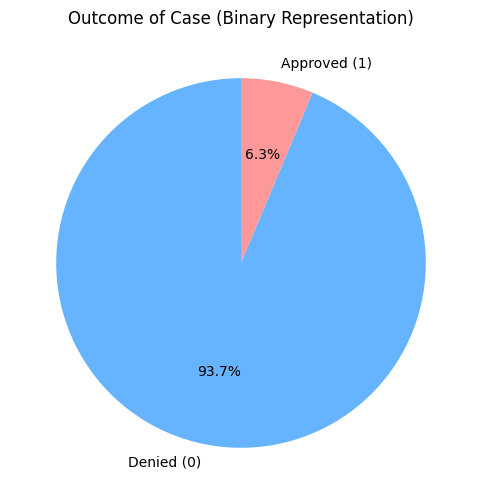

In [ ]:
# ספירת הערכים הבינאריים בעמודת binary_outcome
binary_counts = dca_for_classifier['binary_outcome'].value_counts()

labels = ['Denied (0)','Approved (1)']

plt.figure(figsize=(6, 6))
plt.pie(binary_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Outcome of Case (Binary Representation)')

plt.show()

In [ ]:
binary_counts

,count
binary_outcome,
0.0,680
1.0,46


In [ ]:
file_path = 'dca_for_classifier.csv'  # נתיב לשמירה
dca_for_classifier.to_csv(file_path, index=False, encoding='utf-8')

print(f"הקובץ נשמר בהצלחה בנתיב: {file_path}")

הקובץ נשמר בהצלחה בנתיב: dca_for_classifier.csv


###

In [ ]:
dca_for_classifier.head()

גוף המסמך  \
0  ['פסק-דין בתיק רע"פ 7861/03 בבית המשפט העליון רע"פ 7861/03 בפני: כבוד המישנה לנשיא (בדימ\') מ\' חשין כבוד השופטת ד\' ביניש כבוד השופט א\' ריבלין כבוד השופט א\' א\' לוי כבוד השופט ס\' ג\'ובראן המבקשת: מדינת ישראל נ ג ד המשיבה: המועצה האזורית גליל תחתון בקשת רשות ערעור על פסק-דינו של בית-המשפט המחוזי בנצרת מיום 3.6.03 בע"פ 397/02, שניתן על-ידי כב\' השופטים י\' כהן, א\' אברהם וג\' (דה-ליאו) לוי תאריך הישיבה: י"ח באדר א\' תשס"ה (27.2.05) בשם המבקשת: עו"ד מיכאל קרשן בשם המשיבה: עו"ד אילן גולדנברג פסק-דין המישנה לנשיא (בדימ\') מ\' חשין: ברחבי ישראל - בתחומיהן של ערים, מועצותמקומיות ומועצות אזוריות - פזורים, זעיר-שם זעיר-שם, מאות אתרים לסילוק פסולתלמיניה: אשפה, זבל, גרוטאות, פסולת צמחים, פסולת בעלי חיים, פסולת מן התעשיהוהחקלאות ועוד. אתרים אלה לסילוק פסולת, יש שהם מורשים על-פי דין ויש שאין הםמורשים ואין הם מוסדרים, לא על-פי דין ולא בכלל. זו הפעם אין ענייננו באתריםהמורשים אלא באתרים הבלתי-מורשים בלבד, וככינוים בלשון היומיום: אתרי פסולת"פיראטיים". אותם אתרים פיראטיים משמשים, בעיקרם, את היישובים הסמוכיםלהם - ביתר דיוק: היישובים שבתחום המועצה האזורית יצרו והקימו, כל אחד מהם לעצמו,אתר "פיראטי" לסילוק פסולת משל-עצמו - ואולם הלכה למעשה, כל דיכפין וכלדצריך ייתי וישליך באותם אתרים פסולת למיניה, ואין מְכַהֶה. אם כך באשר לצבירתהפסולת, לא כך באשר לטיפול באותם אתרים. אתרים אלה, אין מטפלים בהם כנדרש וממילאיוצרים הם מיפגעי סביבה למיניהם: ריחות חזקים ובלתי נעימים, זיהום אוויר קשה,זיהום מי תהום ועוד. השאלה הנשאלת היא, מי הוא זה ואיזה הוא האדם או הגוף האחראיםעל-פי דין לאותם מיפגעים? וביתר דיוק וחידוד: האם הרשות המקומית – בענייננו: המועצההאזורית – אחראית בפלילים בשל מחדליה לפקח כיאות על האתרים הפיראטיים ולהסדיר בהםאת הצורך הסדר? בית המשפט המחוזי פסק פסוקו כי המועצה האזורית גליל תחתון – המשיבהלערעור – אינה חייבת בפלילים בעניינם של אתרי פסולת פיראטיים שנמצאו בתחומה ואשרגרמו מיפגעי סביבה אלה ואחרים, והכרעת-דין זו העלתה המדינה לפנינו לביקורת. נפתחבעיקרי העובדות שלעניין, ובהליכים שהיו עד-כה. עיקרי העובדות שלעניין וההליכים שהיועד כה 2. ענייננו בשמונה אתרי פסולת פיראטיים (אתרי פסולת או האתרים או המיזבלות) אשר פעלו – וכמסתבר, ממשיכים הם לפעול – בשולי שמונהישובים שבשטח שיפוטה של המועצה האזורית גליל תחתון (המועצה או המועצה האזורית).האתרים הוקמו – אם הקמה הוא המושג הנכון – לפני עשרות בשנים, ותושבי הישוביםשבתחום שיפוטה של המועצה נהגו ונוהגים להשליך אליהם פסולת למיניה, פסולת ביתיתופסולת חקלאית. בסידרת ביקורות שערכו פקחי המשרד לאיכות הסביבה בשנים 1990 עד 1994,נמצאו באתרים אלה מיפגעי סביבה רבים, ובהם: ערימות פסולת מפוזרות ובלתי מכוסות;פיגרי חיות במצב ריקבון מתקדם; בעירות פסולת או סימני שריפה ובעירה; ריחות בלתינסבלים שהתפשטו באזור. לאחר אזהרות חוזרות ונישנות, הודעות וצווים לסילוק מיפגעים –והכל ללא הועיל, הוגש ביום 21.6.95 לבית-משפט השלום בנצרת כתב-אישום נגד המועצה,נגד ראש המועצה בשנים הרלוונטיות ונגד תברואן המועצה (שלושתם יחדיו – הנאשמים). 3. בהכרעת הדין סקר בית-משפט השלום (סגניתהנשיא, השופטת אביטל בית-נר) באריכות ובפרוטרוט את הראיות למיניהן שהובאו לפניובאשר לכל אתר ואתר מאתרי הפסולת, ולסופה של הכרעת הדין סיכם בית-המשפט את עיקרימימצאיו בלשון זו: 11. מהראיות שהובאו בפני ... עולה כי: א. במועדיםשונים היו בעירות או סימני בעירה וכן היה ריח רע באתרים: בית-רימון, כפר קיש,קיבוץ לביא, בית-קשת, שרונה, שדה אילן והודיות. בשדמות דבורה היו דיווחים על פגריםוריח בלתי נסבל, אך לאור ההגדרה בתקנה 2, לא אוכל לומר שהוכח כי לגבי אתר זה היהמפגע של ריח וזיהום אוויר בלתי סבירים. ב. בכלהאתרים שנמצאו בהן [כך] בעירות, הן לא כובו באופן מיידי, לא היתה פעולת כיסוייומיומית כנדרש וגם לא היה גידור מלא ושערים. ג. הנאשמיםלא מילאו אחר הודעות וצווים לסילוק מפגעים, שנשלחו אליהם למכביר. משקבע מימצאים אלה שקבע, החליט בית-משפט השלוםלהרשיע את הנאשמים כולם בעשיית עבירות שעברו על-פי דברי-חוק אחדים, בראשם החוקלמניעת מיפגעים, תשכ"א-1961 והתקנות שלפיו (בעיקר: עבירות שעניינן גרימת ריחוזיהום אוויר חזקים או בלתי סבירים). בה-בעת זיכה בית-המשפט את הנאשמים מעבירותאחרות שהואשמו בהן. משהרשיע את הנאשמים כך בדינם, גזר עליהם בית-המשפט עונשיםשונים – בעיקרם עונשי קנסות – והוסיף והורה על סגירת חמישה מתוך שמונה אתרי הפסולתשהיוו נושא לכתב-האישום אלא אם תעשה המועצה לתיקון הליקויים שנתגלו באותם אתרים. 4. הנאשמים ערער